In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway # For ANOVA

#  Configure plot styles for better aesthetics
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('viridis')

In [3]:
print("--- Step 1: Loading Cleaned Data ---")

# Define file paths for cleaned data
benin_path = '../data/benin_clean.csv'
sierra_leone_path = '../data/sierra_leone_clean.csv'
togo_path = '../data/togo_clean.csv'

# Load each dataset
try:
    df_benin = pd.read_csv(benin_path)
    df_benin['Country'] = 'Benin' # Add a 'Country' column for identification
    print(f"Loaded {benin_path}")
except FileNotFoundError:
    print(f"Error: {benin_path} not found. Ensure you exported it in Task 2 and the path is correct.")
    df_benin = pd.DataFrame() # Create empty DataFrame to avoid errors later

try:
    df_sierra_leone = pd.read_csv(sierra_leone_path)
    df_sierra_leone['Country'] = 'Sierra Leone'
    print(f"Loaded {sierra_leone_path}")
except FileNotFoundError:
    print(f"Error: {sierra_leone_path} not found. Ensure you exported it in Task 2 and the path is correct.")
    df_sierra_leone = pd.DataFrame()

try:
    df_togo = pd.read_csv(togo_path)
    df_togo['Country'] = 'Togo'
    print(f"Loaded {togo_path}")
except FileNotFoundError:
    print(f"Error: {togo_path} not found. Ensure you exported it in Task 2 and the path is correct.")
    df_togo = pd.DataFrame()

# Concatenate all DataFrames into a single DataFrame for easier comparison
# Filter out empty DataFrames in case of loading errors
all_dfs = [df for df in [df_benin, df_sierra_leone, df_togo] if not df.empty]

if all_dfs:
    combined_df = pd.concat(all_dfs, ignore_index=True)
    print("\nCombined DataFrame created successfully.")
    print(f"Combined DataFrame shape: {combined_df.shape}")
    print(combined_df['Country'].value_counts())
else:
    print("\nNo data loaded. Please check file paths and ensure cleaned CSVs exist.")
    combined_df = pd.DataFrame() # Ensure combined_df is defined even if empty

--- Step 1: Loading Cleaned Data ---
Loaded ../data/benin_clean.csv
Loaded ../data/sierra_leone_clean.csv
Loaded ../data/togo_clean.csv

Combined DataFrame created successfully.
Combined DataFrame shape: (1576800, 28)
Country
Benin           525600
Sierra Leone    525600
Togo            525600
Name: count, dtype: int64



--- Step 2: Metric Comparison - Boxplots ---


C:\Users\Admin\AppData\Local\Temp\ipykernel_10320\3075802779.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined_df, palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipykernel_10320\3075802779.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined_df, palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipykernel_10320\3075802779.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined_df, palette='viridis')


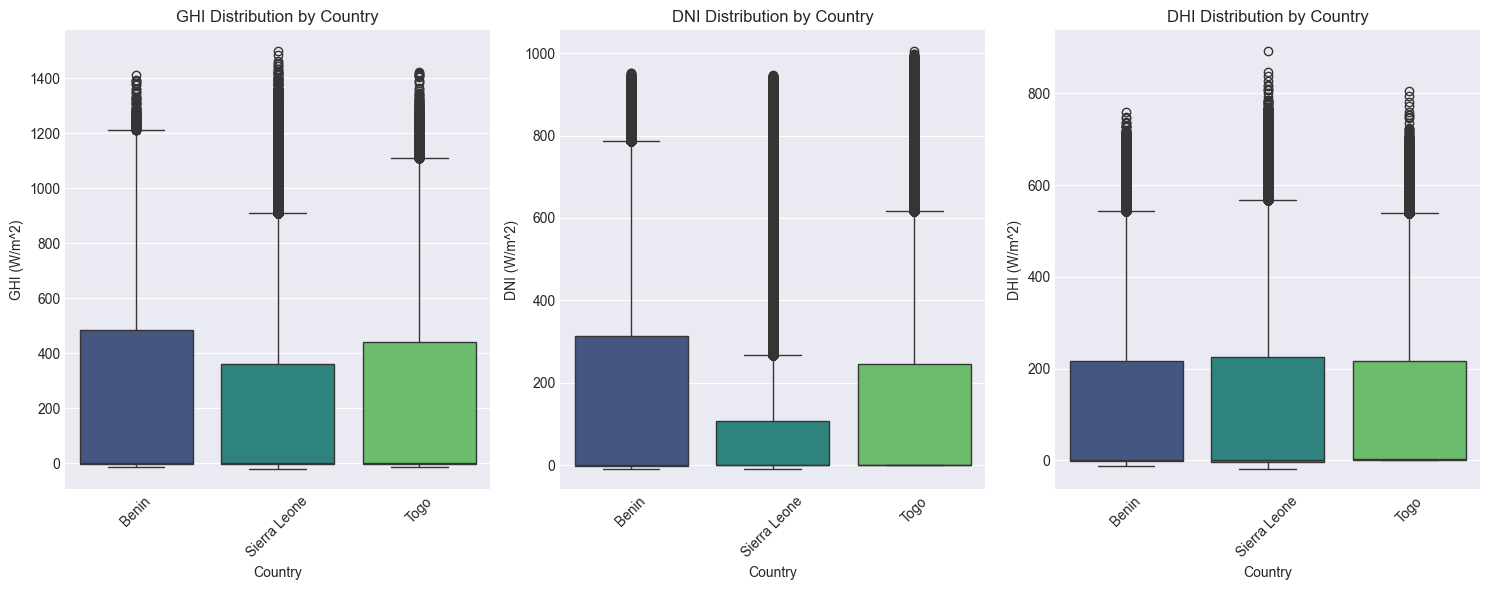

In [4]:
print("\n--- Step 2: Metric Comparison - Boxplots ---")

if not combined_df.empty:
    metrics = ['GHI', 'DNI', 'DHI']
    plt.figure(figsize=(15, 6))

    for i, metric in enumerate(metrics):
        plt.subplot(1, len(metrics), i + 1)
        sns.boxplot(x='Country', y=metric, data=combined_df, palette='viridis')
        plt.title(f'{metric} Distribution by Country')
        plt.xlabel('Country')
        plt.ylabel(f'{metric} (W/m^2)')
        plt.xticks(rotation=45) # Rotate labels if they overlap

    plt.tight_layout()
    plt.show()
else:
    print("Cannot generate boxplots as combined_df is empty.")

In [6]:
print("\n--- Step 3: Metric Comparison - Summary Table ---")

if not combined_df.empty:
    summary_table = combined_df.groupby('Country').agg(
        # GHI metrics
        GHI_Mean=('GHI', 'mean'),
        GHI_Median=('GHI', 'median'),
        GHI_Std_Dev=('GHI', 'std'),
        # DNI metrics
        DNI_Mean=('DNI', 'mean'),
        DNI_Median=('DNI', 'median'),
        DNI_Std_Dev=('DNI', 'std'),
        # DHI metrics
        DHI_Mean=('DHI', 'mean'),
        DHI_Median=('DHI', 'median'),
        DHI_Std_Dev=('DHI', 'std')
    ).round(2) # Round to 2 decimal places for cleaner output

    print("\nSummary Table: Mean, Median, and Standard Deviation of GHI, DNI, DHI by Country:")
    print(summary_table)
else:
    print("Cannot generate summary table as combined_df is empty.")


--- Step 3: Metric Comparison - Summary Table ---

Summary Table: Mean, Median, and Standard Deviation of GHI, DNI, DHI by Country:
              GHI_Mean  GHI_Median  GHI_Std_Dev  DNI_Mean  DNI_Median  \
Country                                                                 
Benin           240.56         1.8       331.13    167.19        -0.1   
Sierra Leone    201.96         0.3       298.50    116.38        -0.1   
Togo            230.56         2.1       322.53    151.26         0.0   

              DNI_Std_Dev  DHI_Mean  DHI_Median  DHI_Std_Dev  
Country                                                       
Benin              261.71    115.36         1.6       158.69  
Sierra Leone       218.65    113.72        -0.1       158.95  
Togo               250.96    116.44         2.5       156.52  


In [7]:
print("\n--- Step 4: Statistical Testing (One-way ANOVA on GHI) ---")

if not combined_df.empty:
    # Extract GHI values for each country
    ghi_benin = combined_df[combined_df['Country'] == 'Benin']['GHI'].dropna()
    ghi_sierra_leone = combined_df[combined_df['Country'] == 'Sierra Leone']['GHI'].dropna()
    ghi_togo = combined_df[combined_df['Country'] == 'Togo']['GHI'].dropna()

    # Check if all groups have data
    if not (ghi_benin.empty or ghi_sierra_leone.empty or ghi_togo.empty):
        # Perform one-way ANOVA
        f_statistic, p_value = f_oneway(ghi_benin, ghi_sierra_leone, ghi_togo)

        print(f"\nOne-way ANOVA Results for GHI across Countries:")
        print(f"  F-statistic: {f_statistic:.4f}")
        print(f"  P-value:     {p_value:.4f}")

        # Interpret the p-value
        alpha = 0.05 # Significance level
        if p_value < alpha:
            print(f"\nConclusion: With a p-value ({p_value:.4f}) less than the significance level ({alpha}),")
            print("  we reject the null hypothesis. This suggests there is a statistically significant")
            print("  difference in the mean GHI between at least two of the countries.")
        else:
            print(f"\nConclusion: With a p-value ({p_value:.4f}) greater than the significance level ({alpha}),")
            print("  we fail to reject the null hypothesis. This suggests there is no statistically significant")
            print("  difference in the mean GHI across the countries.")
    else:
        print("Not all countries have GHI data available for ANOVA.")
else:
    print("Cannot perform ANOVA as combined_df is empty.")


--- Step 4: Statistical Testing (One-way ANOVA on GHI) ---

One-way ANOVA Results for GHI across Countries:
  F-statistic: 2090.0929
  P-value:     0.0000

Conclusion: With a p-value (0.0000) less than the significance level (0.05),
  we reject the null hypothesis. This suggests there is a statistically significant
  difference in the mean GHI between at least two of the countries.



--- Step 6: (Bonus) Visual Summary - Average GHI Ranking ---


C:\Users\Admin\AppData\Local\Temp\ipykernel_10320\4023158664.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi_by_country.index, y=avg_ghi_by_country.values, palette='viridis')


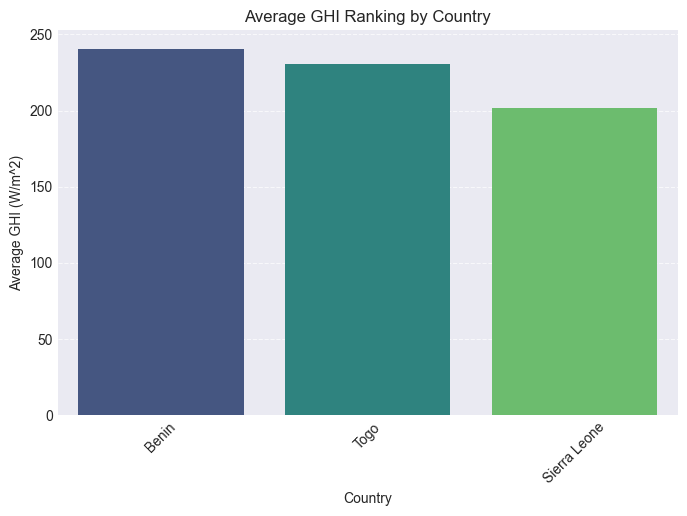

In [10]:
print("\n--- Step 6: (Bonus) Visual Summary - Average GHI Ranking ---")

if not combined_df.empty:
    avg_ghi_by_country = combined_df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=avg_ghi_by_country.index, y=avg_ghi_by_country.values, palette='viridis')
    plt.title('Average GHI Ranking by Country')
    plt.xlabel('Country')
    plt.ylabel('Average GHI (W/m^2)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Cannot generate bonus bar chart as combined_df is empty.")

In [13]:
### Key Observations from Cross-Country Comparison

#* **Observation 1:** [e.g., "Benin consistently exhibits the highest median GHI and DNI, suggesting strong overall solar potential compared to Sierra Leone and Togo."]
#* **Observation 2:** [e.g., "Sierra Leone displays the greatest variability (indicated by higher standard deviation and wider boxplots) in GHI, implying more fluctuating solar conditions or potentially more outliers in its data."]
#* **Observation 3:** [e.g., "While Togo's average GHI is lower than Benin's, its DHI (diffuse horizontal irradiance) values might be more consistent, which could be relevant for specific solar technologies that perform better with diffuse light."]
#* **ANOVA Insight:** [Based on your ANOVA output, e.g., "The ANOVA test confirmed a statistically significant difference in mean GHI across the countries (p < 0.001), reinforcing that their solar potentials are indeed distinct."]